In [25]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset as datafram
df = pd.read_csv("heart.csv")

In [20]:
# Preprocessing data

1. age = idade
2. sex = sexo
3. cp = tipo de dor no peito (4 valores)
4. trestbps = pressão arterial em repouso
5. chol = colestoral sérico em mg / dl
6. fbs =  açúcar no sangue em jejum> 120 mg / dl
7. restecg = resultados eletrocardiográficos em repouso (valores 0,1,2)
8. thalach = frequência cardíaca máxima alcançada
9. exang = angina induzida por exercício
10. oldpeak = depressão ST induzida pelo exercício em relação ao repouso
11. slope = a inclinação do segmento ST de pico do exercício
12. ca = número de grandes embarcações (0-3) coloridas por flourosopy
13. thal = 3 = normal; 6 = defeito fixo; 7 = defeito reversível

In [26]:
# Analise da estrutura dos dados

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Analise dos tipos dos dados

print(df.dtypes)
print('\nOs dados estão em sua maioria no formato int, apenas a variável "oldpeak" em formato float.')
print('As variáveis "sex, cp, fbs, restecg, exang, slope, ca, thal, target" apesar de estarem em formato "int" podem ser reclassificadas como do tipo "category" pois são dados categóricos. ')

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Os dados estão em sua maioria no formato int, apenas a variável "oldpeak" em formato float.
As variáveis "sex, cp, fbs, restecg, exang, slope, ca, thal, target" apesar de estarem em formato "int" podem ser reclassificadas como do tipo "category" pois são dados categóricos. 


In [30]:
# Check missing data

missing = df.isnull().sum()
print(missing)

answer = df.isnull().values.any()
print("\nHá valores missing no dataset: ", answer)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Há valores missing no dataset:  False


In [36]:
# Analise de outliers

print(df[["age", "trestbps", "chol", "thalach", "oldpeak"]].describe())
print("\nApenas foi considerado os dados do tipo quantitativo.")
print("Aparentemente os dados parece estar dentro da realidade.")

              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

Apenas foi considerado os dados do tipo quantitativo
Aparentemente os dados parece estar dentro da realidade


##  Exploratory data analysis

In [ ]:

# Any question that are necessary to answer

# Who has more heart disease men or women?
# Number of people with heart disease?
# How old is the diagnosis of heart disease most often?
# People without heart disease can raise heart rate?
# People with> 120mg blood sugar higher chances of heart disease?
# Are people with high cholesterol prone to heart disease?
# Which type of chest pain is more frequently when the people is sick?

In [25]:
# 1. age = idade
# 2. sex = sexo
# 3. cp = tipo de dor no peito (4 valores)
# 4. trestbps = pressão arterial em repouso
# 5. chol = colestoral sérico em mg / dl
# 6. fbs =  açúcar no sangue em jejum> 120 mg / dl
# 7. restecg = resultados eletrocardiográficos em repouso (valores 0,1,2)
# 8. thalach = frequência cardíaca máxima alcançada
# 9. exang = angina induzida por exercício
# 10. oldpeak = depressão ST induzida pelo exercício em relação ao repouso
# 11. slope = a inclinação do segmento ST de pico do exercício
# 12. ca = número de grandes embarcações (0-3) coloridas por flourosopy
# 13. thal = 3 = normal; 6 = defeito fixo; 7 = defeito reversível

[207, 96] ['Male', 'Female']


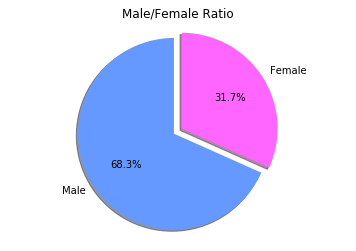

Quantity of Male is bigger than Female in this dataset


In [118]:
# Pie Chart about % male and female in dataset

sex = heart['sex']
val_counts = sex.value_counts()
sizes = list(val_counts.values)
labels = ['Male', 'Female']
colors = ['#6699ff', '#ff66ff']

print(sizes, labels)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1, 0), autopct='%1.1f%%', colors= colors)
ax.axis('equal')
plt.title('Male/Female Ratio')
plt.show()
print('Quantity of Male is bigger than Female in this dataset')

[165, 138] ['Heart Disease', 'No Disease']


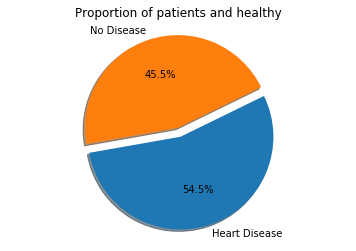

Quantity of peoples sick is bigger than healthy peoples


In [119]:
# Pie chart about proportion of peoples have Heart disease a haven't heart disease

target = heart['target']
target_counts = target.value_counts()
sizes2 = list(target_counts.values)
labels2 = ['Heart Disease', 'No Disease']
print(sizes2, labels2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes2 , labels=labels2,shadow=True, startangle=190, explode=(0.1, 0), autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Proportion of patients and healthy')
plt.show()

print('Quantity of peoples sick is bigger than healthy peoples')

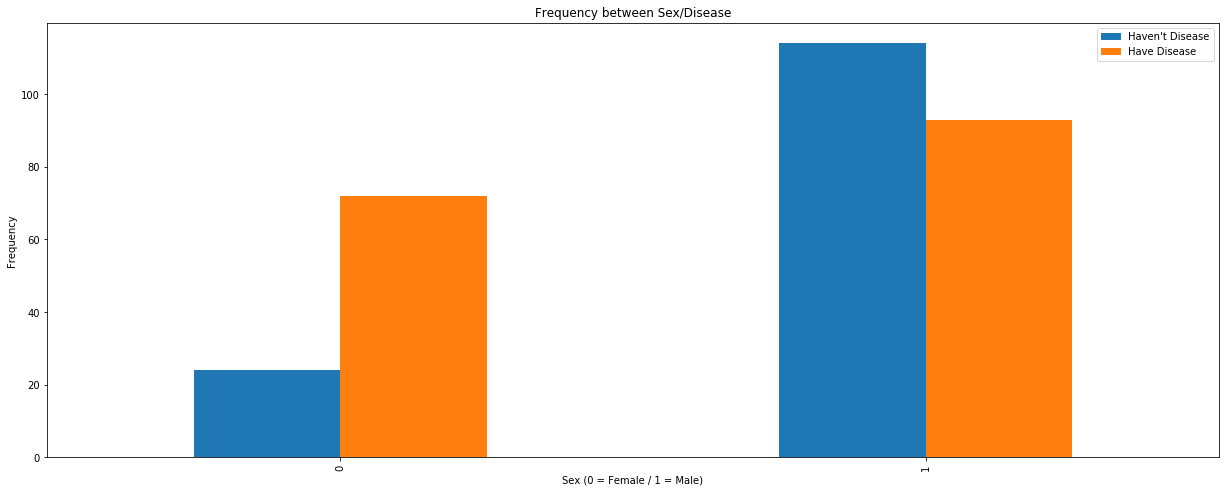

In this dataset, it seems that females has more probability to have Heart Disease than males


In [125]:
# In this graph we will analyze relationship between Sex x Disease

pd.crosstab(heart.sex, heart.target).plot(kind="bar", figsize = (21,8))
plt.title('Frequency between Sex/Disease')
plt.xlabel('Sex (0 = Female / 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

print('In this dataset, it seems that females has more probability to have Heart Disease than males')

In [126]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [127]:
print('This table is very important to analyze this Dataset. Pessoas descobrem mais cedo esses tipos de doença, elas possuem dores mais fortes no peito, e uma frequencia cardiaca maior')

This table is very important to analyze this Dataset. Pessoas descobrem mais cedo esses tipos de doença, elas possuem dores mais fortes no peito, e uma frequencia cardiaca maior


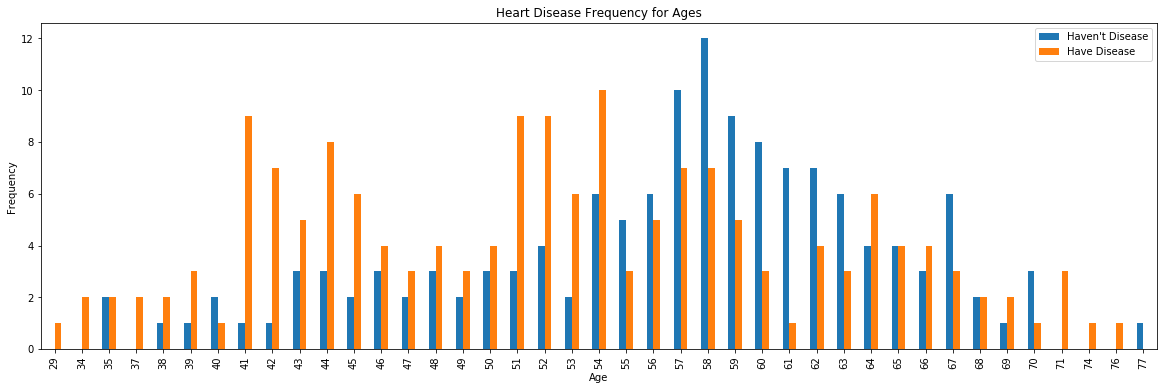

In [102]:
# In this graph we will find relationship between Age and Heart Disease

pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

print('The symptoms of the disease in the heart is to appear between the age of 40-55 years')
print('Pessoas acima de 55 anos tem uma probabilidade menor de ter doença do coração dado que nao tiveram antes')

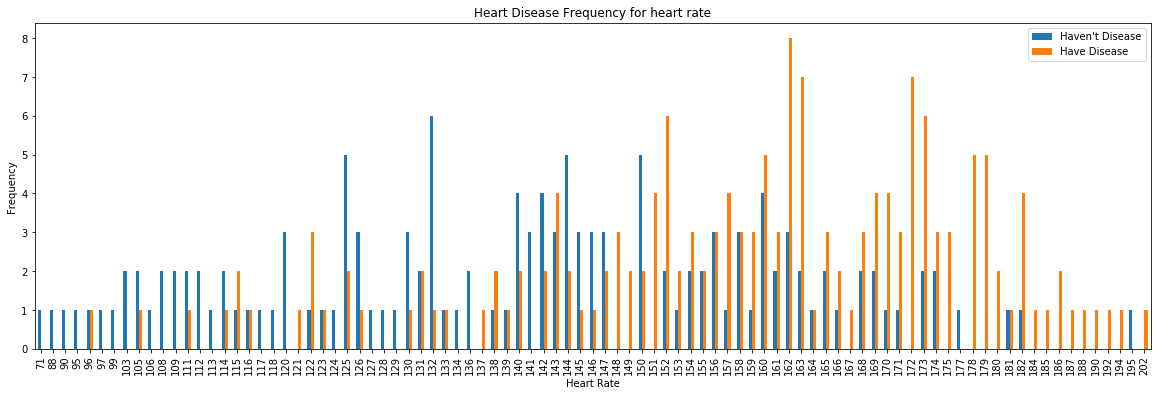

In general, people who have a high heart rate above 150 bpm tend to have heart disease. 


In [123]:
# In this crosstab plot we will find relationship between Heart Rate x Heart Disease 

pd.crosstab(heart.thalach, heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for heart rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

print('In general, people who have a high heart rate above 150 bpm tend to have heart disease. ')

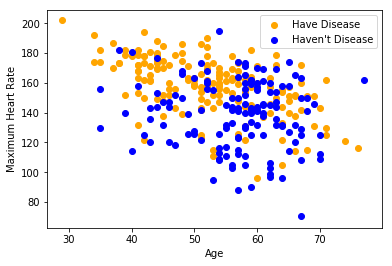

In [108]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="orange")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[heart.target==0], c="blue")
plt.legend(["Have Disease", "Haven't Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

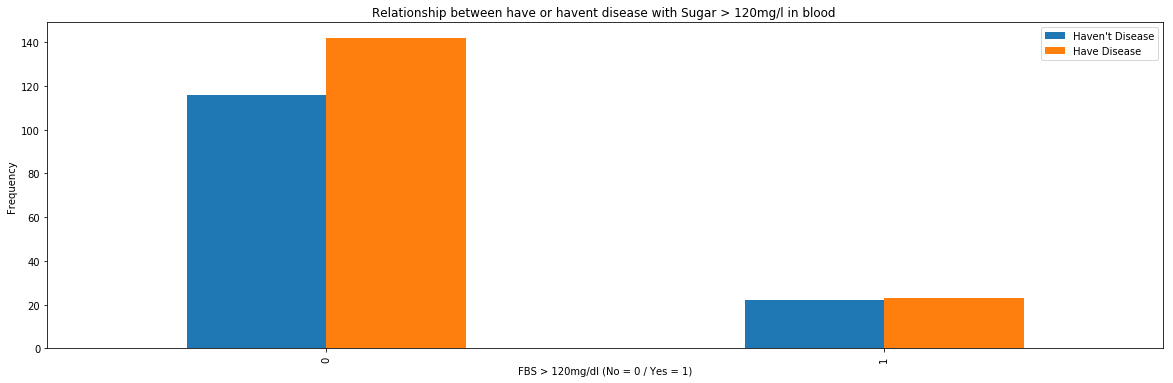

In [100]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Relationship between have or havent disease with Sugar > 120mg/l in blood ')
plt.xlabel("FBS > 120mg/dl (No = 0 / Yes = 1)")
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel("Frequency")
plt.show()

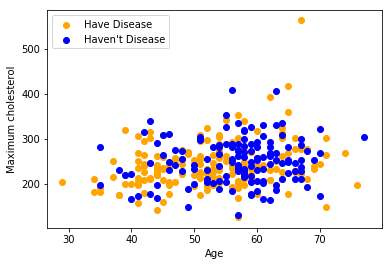

There seems to be no relationship between sugar and heart problems in the short term.


In [129]:
plt.scatter(x=heart.age[heart.target==1], y=heart.chol[(heart.target==1)], c="orange")
plt.scatter(x=heart.age[heart.target==0], y=heart.chol[heart.target==0], c="blue")
plt.legend(["Have Disease", "Haven't Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum cholesterol")
plt.show()


print('There seems to be no relationship between sugar and heart problems in the short term.')

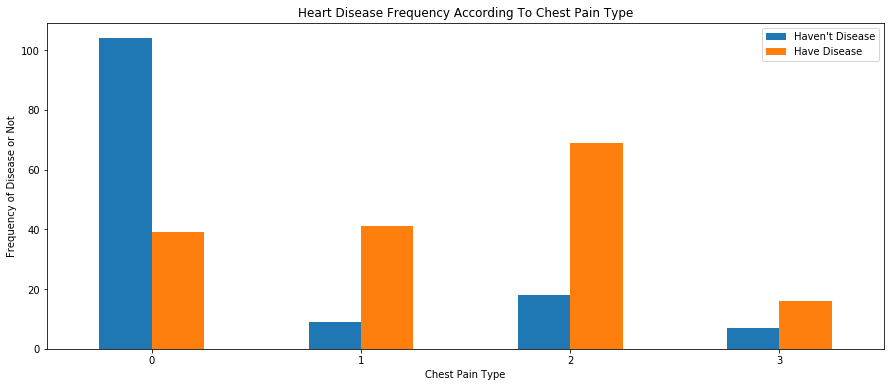

Peoples with 1,2,3 Chest pain Type have a high chance of being sick
 The pain 2 is more frequently when the people is sick


In [131]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

print("Peoples with 1,2,3 Chest pain Type have a high chance of being sick")
print(" The pain 2 is more frequently when the people is sick")

## Creating machine learning model to predict who will have heart disease

In [140]:
# Splitting of data - 75% for training data and 25% for test data
# Importing the train_test_split

from sklearn.model_selection import train_test_split

In [141]:
# Variable target
Y = heart.target.values

# Variable prediction
X = heart.drop(['target'], axis = 1)

In [142]:
# Setting split rate
split_test_size = 0.25

In [143]:
# Creating test data and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [145]:
# Printing results

print("{0:0.2f}% nos dados de treino".format((len(X_train)/len(heart.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_test)/len(heart.index)) * 100))

74.92% nos dados de treino
25.08% nos dados de teste


In [146]:
# Building and Trainning Classification Model

# Importing Classifier modules
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [147]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train.ravel())
KNN_predict_test = model_KNN.predict(X_test)
    
acc_KNN = accuracy_score(Y_test, KNN_predict_test)
print(acc_KNN)
print(confusion_matrix(Y_test, KNN_predict_test))

0.6973684210526315
[[22 13]
 [10 31]]


In [148]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train.ravel())
DT_predict_test = model_DT.predict(X_test)

acc_DT = accuracy_score(Y_test, DT_predict_test)
print(acc_DT)
print(confusion_matrix(Y_test, DT_predict_test))

0.7894736842105263
[[27  8]
 [ 8 33]]


In [151]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, Y_train.ravel())
RF_predict_test = model_RF.predict(X_test)

acc_RF = accuracy_score(Y_test, RF_predict_test)
print(acc_RF)
print(confusion_matrix(Y_test, RF_predict_test))

0.8947368421052632
[[31  4]
 [ 4 37]]


C:\Users\aluno\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [152]:
model_XG = GradientBoostingClassifier()
model_XG.fit(X_train, Y_train.ravel())
XG_predict_test = model_XG.predict(X_test)

acc_XG = accuracy_score(Y_test, XG_predict_test)
print(acc_XG)
print(confusion_matrix(Y_test, XG_predict_test))

0.7631578947368421
[[26  9]
 [ 9 32]]
